In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Dataset

### Step 1

In [270]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [271]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


# 2.1 Data Cleaning

###  Step 1 

In [272]:
data.duplicated()
data.drop_duplicates()
#Check the dataset for duplicates and drop duplicates

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [273]:
data.isnull().sum()
#Check the dataset for NaN values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Step 2

In [274]:
data.dtypes
#Checking all datatypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [275]:
data_age = data[(data['age'] > 60) & (data['age'] <= 61)]
data_age

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
128,61.000,0,248,0,30,1,267000.0,0.7,136,1,1,104,0
143,61.000,1,84,0,40,1,229000.0,0.9,141,0,0,110,0
185,60.667,1,104,1,30,0,389000.0,1.5,136,1,0,171,1
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172,0
245,61.000,1,80,1,38,0,282000.0,1.4,137,1,0,213,0
264,61.000,0,582,1,38,0,147000.0,1.2,141,1,0,237,0


In [276]:
data.age = data.age.round()

In [277]:
data.age = data.age.astype(int)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


# 2.2 Data Exploration

### Step 1

In [279]:
data.describe()
#View basic statistical details of the dataframe like: count, mean, std .etc.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Step 2 

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

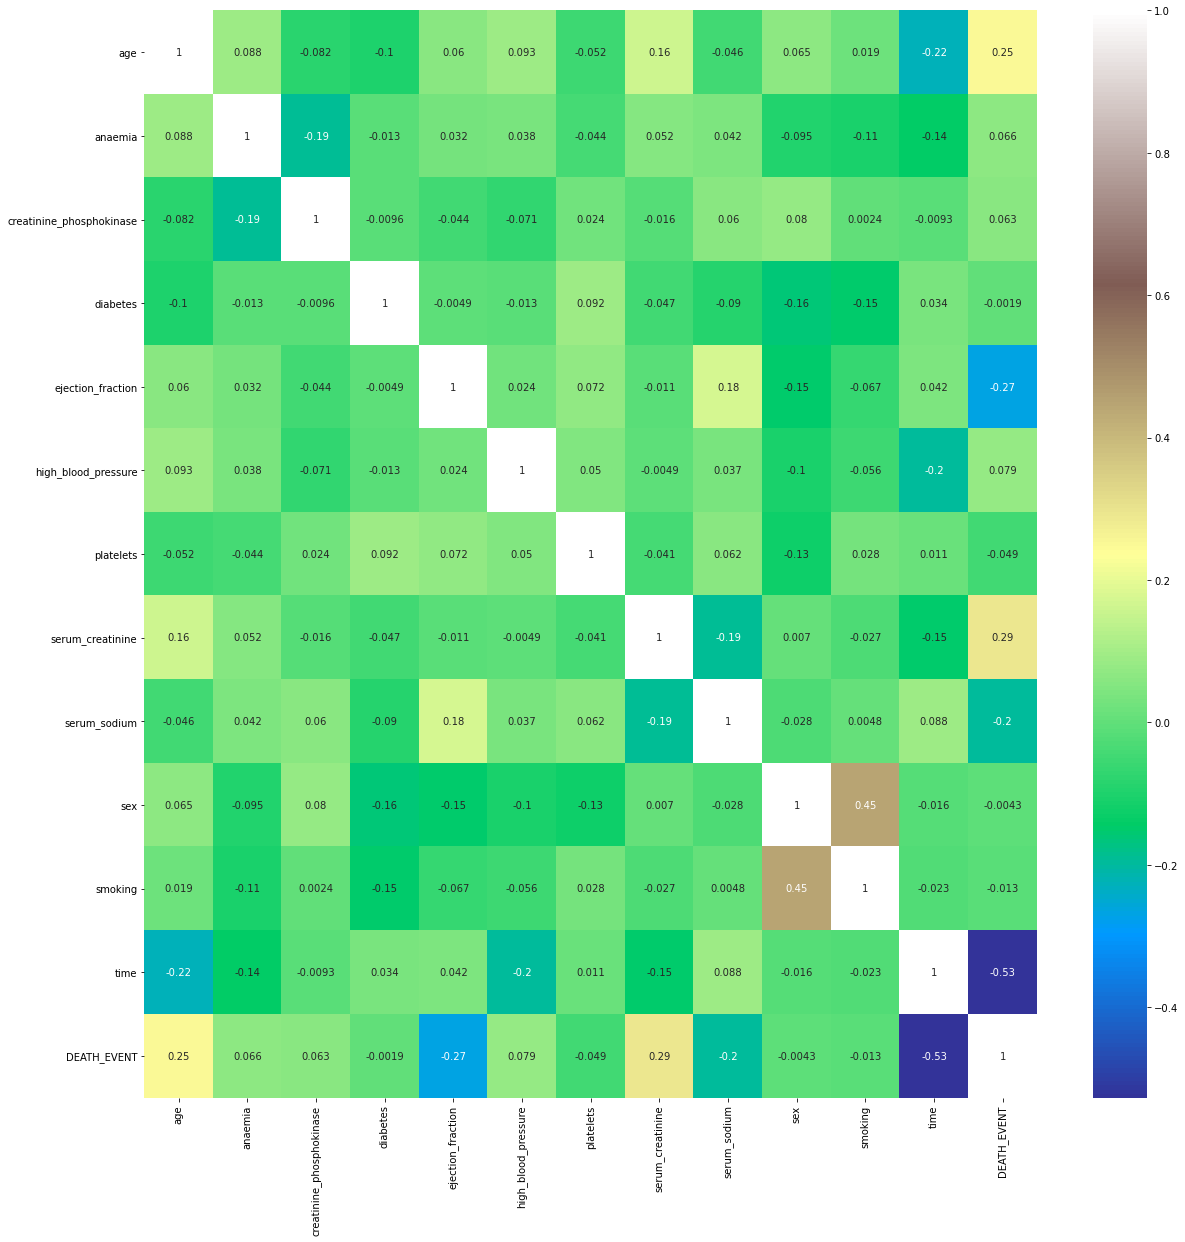

In [280]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'terrain')

### Step3

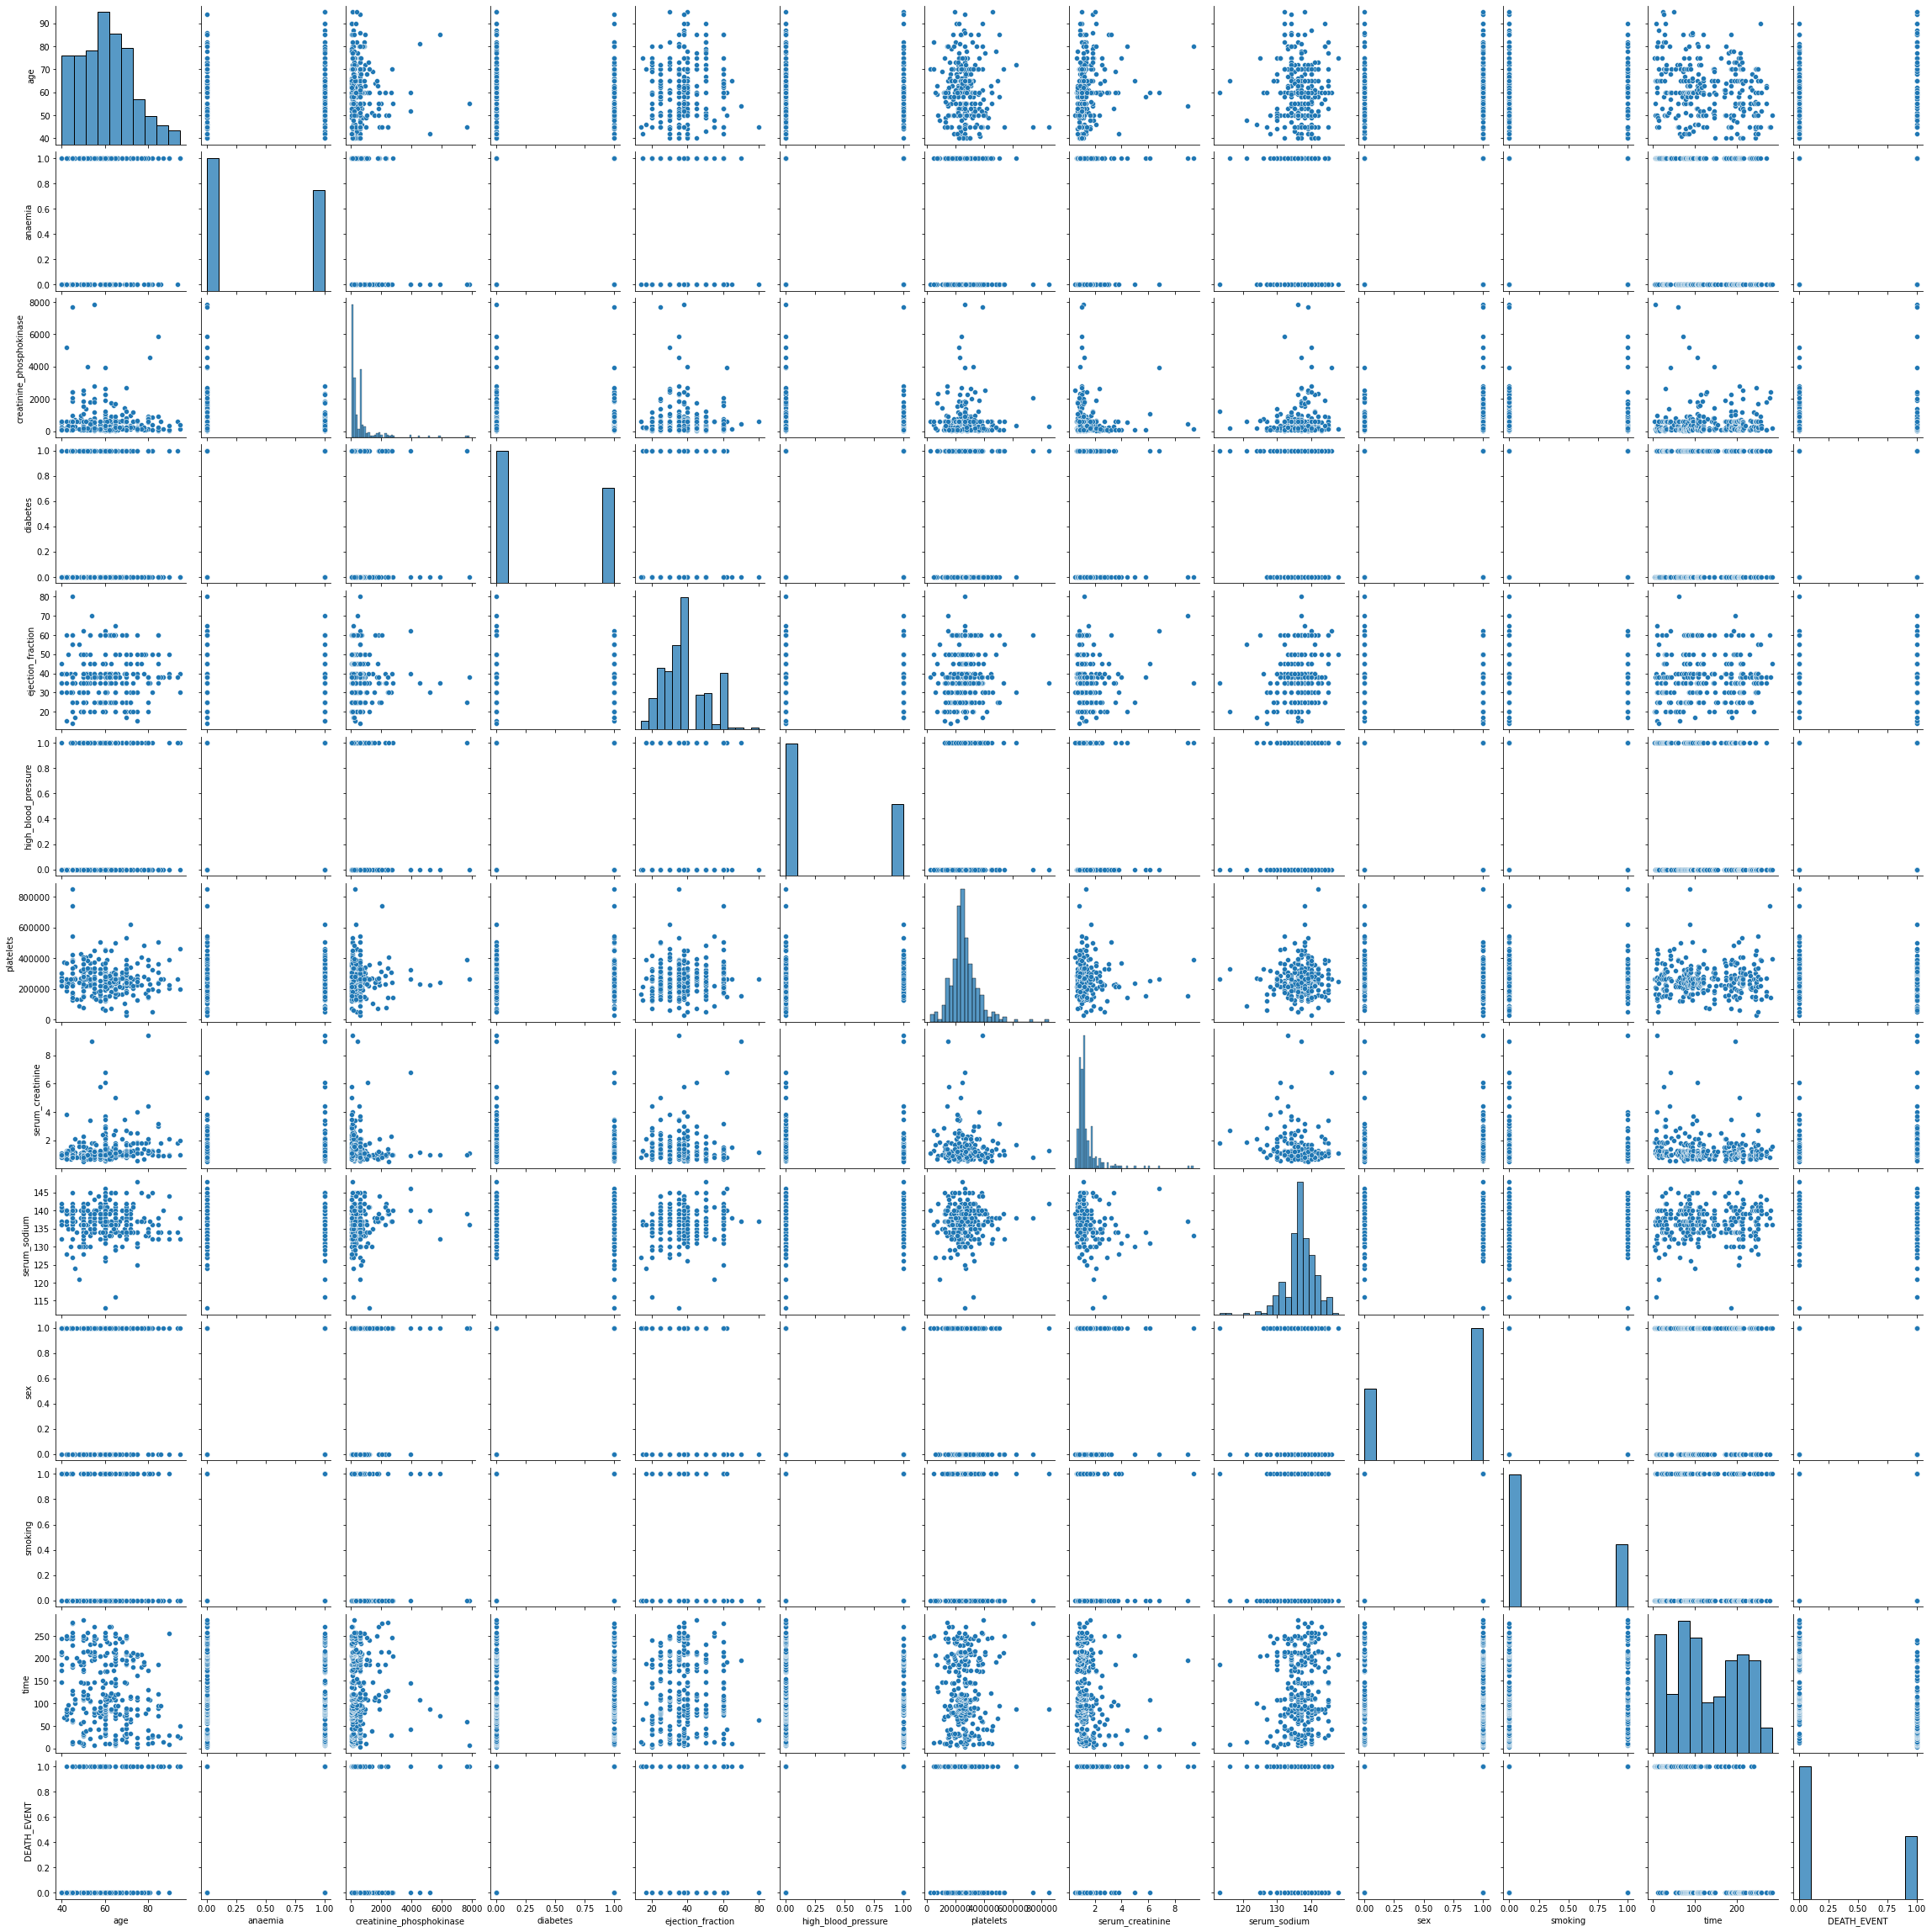

In [281]:
sns.pairplot(data=data)

In [282]:
# - age: age of the patient (years)
# - anaemia: decrease of red blood cells or hemoglobin (boolean)
# - high blood pressure: if the patient has hypertension (boolean)
# - creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
# - diabetes: if the patient has diabetes (boolean)
# - ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
# - platelets: platelets in the blood (kiloplatelets/mL)
# - sex: woman or man (binary)
# - serum creatinine: level of serum creatinine in the blood (mg/dL)
# - serum sodium: level of serum sodium in the blood (mEq/L)
# - smoking: if the patient smokes or not (boolean)
# - time: follow-up period (days)
# - [target] death event: if the patient deceased during the follow-up period (boolean)

## 2.2.1 Exploring each column in the Dataset

### Age column

<AxesSubplot:>

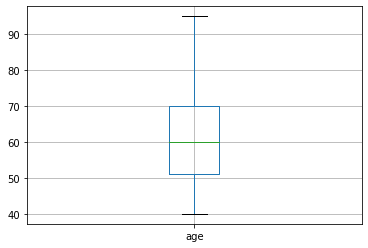

In [283]:
data.boxplot(column=['age'], return_type='axes')
#exploring the age column will give us the Maximum, Minumum, Median, Quartiles of the age group of people in the dataset 

### Anaemia column

<AxesSubplot:>

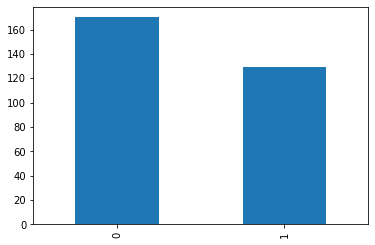

In [284]:
data['anaemia'].value_counts().plot(kind = 'bar')
# exploring the anaemia column will give us the number of cases where there is decrease of red blood cells or hemoglobin 0 = False, 1 = True

### Creatinine phosphokinase column

<AxesSubplot:>

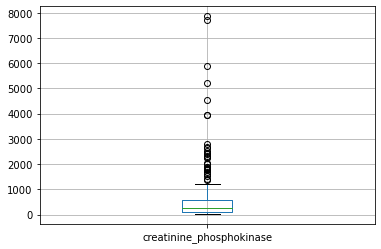

In [285]:
data.boxplot(column=['creatinine_phosphokinase'], return_type='axes')
#exploring the creatinine_phosphokinase column will give us the Maximum, Minumum, Median, Quartiles of the level of the CPK enzyme in the blood (mcg/L)

### Diabetes column

<AxesSubplot:>

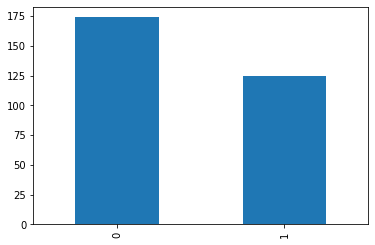

In [286]:
data['diabetes'].value_counts().plot(kind = 'bar')
# exploring the diabetes column will give us the number of cases if the patient has diabetes (boolean) 0 = False, 1 = True

### Ejection fraction column

<AxesSubplot:>

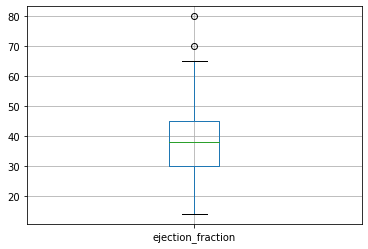

In [287]:
data.boxplot(column=['ejection_fraction'], return_type='axes')
#exploring the ejection_fraction column will give us the Maximum, Minumum, Median, Quartiles of the percentage of blood leaving the heart at each contraction (percentage)

### Platelets column

<AxesSubplot:>

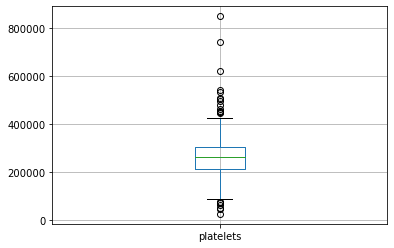

In [288]:
data.boxplot(column=['platelets'], return_type='axes')
#exploring the platelets column will give us the Maximum, Minumum, Median, Quartiles of the  platelets in the blood (kiloplatelets/mL)

### Serum Creatinine column

<AxesSubplot:>

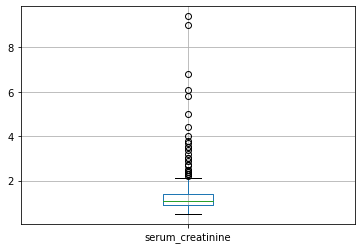

In [289]:
data.boxplot(column=['serum_creatinine'], return_type='axes')
#exploring the serum creatinine column will give us the Maximum, Minumum, Median, Quartiles of the level of serum creatinine in the blood (mg/dL)

### Serum Sodium column 

<AxesSubplot:>

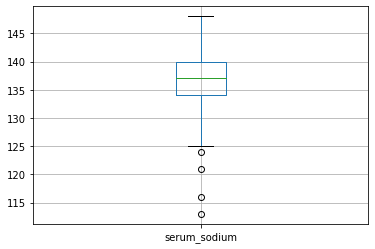

In [290]:
data.boxplot(column=['serum_sodium'], return_type='axes')
#exploring the serum creatinine column will give us the Maximum, Minumum, Median, Quartiles of the level of serum sodium in the blood (mEq/L)

### Sex column

<AxesSubplot:>

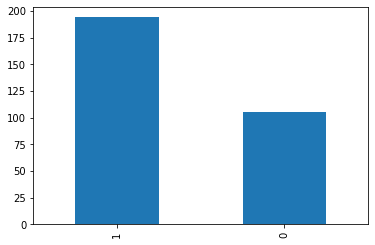

In [291]:
data['sex'].value_counts().plot(kind = 'bar')
# exploring the sex column will give us the number of male and female in the dataset 0 = Female, 1 = Male

### Smoking column

<AxesSubplot:>

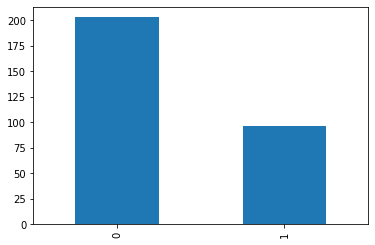

In [292]:
data['smoking'].value_counts().plot(kind = 'bar')
# exploring the sex column will give us the total number of patients in the dataset who smoke or not. 0 = No, 1 = Yes

### Time column 

<AxesSubplot:>

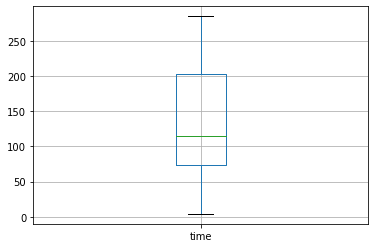

In [293]:
data.boxplot(column=['time'], return_type='axes')
#exploring the time column will give us the Maximum, Minumum, Median, Quartiles of follow-up period (days)

### DEATH_EVENT column 

<AxesSubplot:>

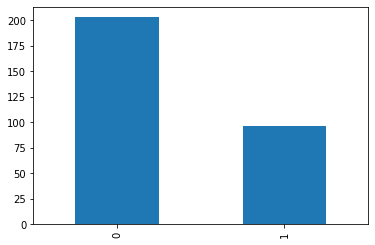

In [294]:
data['DEATH_EVENT'].value_counts().plot(kind = 'bar')
# exploring the death event column will give us the total number patient deceased during the follow-up period (boolean)

## 2.2.2 Exploring the relationship between all pairs of attributes

### 1. Percentage of Male/ Female patients deceased during the follow-up period 

Text(0.5, 1.0, 'Percentage of Male/ Female patients deceased during the follow-up period')

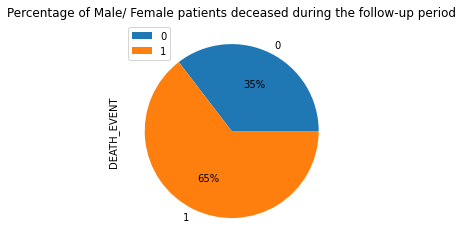

In [295]:
data.groupby(['sex']).sum().plot(kind='pie',y='DEATH_EVENT',autopct='%1.0f%%')
plt.title('Percentage of Male/ Female patients deceased during the follow-up period')

### 2. Percentage of Male/ Female patients who smoke or dont smoke and deceased during the follow-up period 

Text(0.5, 1.0, 'Percentage of Male/ Female patients who smoke or dont smoke and deceased during the follow-up period ')

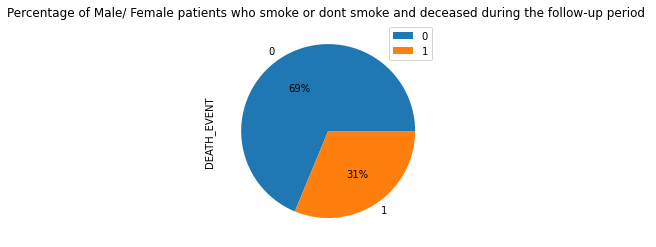

In [296]:
data.groupby(['smoking']).sum().plot(kind='pie',y='DEATH_EVENT',autopct='%1.0f%%')
plt.title('Percentage of Male/ Female patients who smoke or dont smoke and deceased during the follow-up period ')

### 3. Percentage of Male/ Female patients who have high blood pressure or not, and deceased during the follow-up period  

Text(0.5, 1.0, 'Percentage of Male/ Female patients who have high blood pressure or not, and deceased during the follow-up period ')

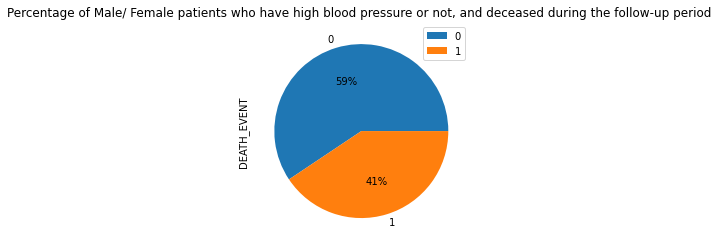

In [297]:
data.groupby(['high_blood_pressure']).sum().plot(kind='pie',y='DEATH_EVENT',autopct='%1.0f%%')
plt.title('Percentage of Male/ Female patients who have high blood pressure or not, and deceased during the follow-up period ')

### 4. Percentage of Male/ Female patients who have anaemia or not, and deceased during the follow-up period  

Text(0.5, 1.0, 'Percentage of Male/ Female patients who have anaemia or not, and deceased during the follow-up period')

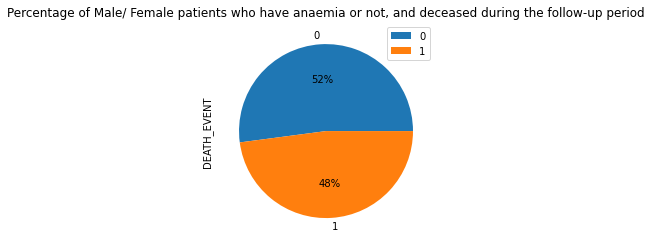

In [298]:
data.groupby(['anaemia']).sum().plot(kind='pie',y='DEATH_EVENT',autopct='%1.0f%%')
plt.title('Percentage of Male/ Female patients who have anaemia or not, and deceased during the follow-up period')

### 5. Percentage of Male/ Female patients who are diabetic or not, and deceased during the follow-up period  

Text(0.5, 1.0, 'Percentage of Male/ Female patients who are diabetic or not, and deceased during the follow-up period  ')

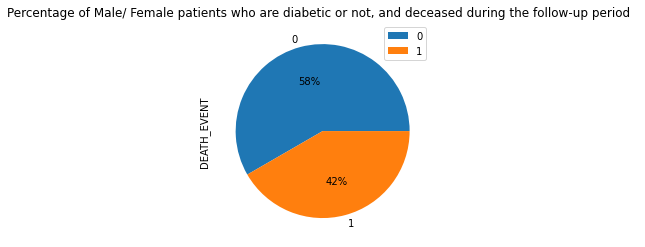

In [299]:
data.groupby(['diabetes']).sum().plot(kind='pie',y='DEATH_EVENT',autopct='%1.0f%%')
plt.title('Percentage of Male/ Female patients who are diabetic or not, and deceased during the follow-up period  ')

### 6. Total count of patients across different age groups who were and were not deceased during the follow-up period

Text(0.5, 1.0, 'Total count of patients across different age groups who were and were not deceased during the follow-up period')

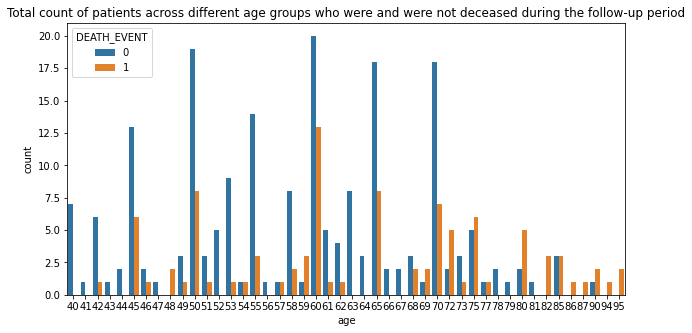

In [300]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='age', hue='DEATH_EVENT')
plt.title('Total count of patients across different age groups who were and were not deceased during the follow-up period')

### 7. Percentage of females and males in different age groups having heart diseases

Text(0.5, 1.0, 'Percentage of females and males in different age groups having heart diseases')

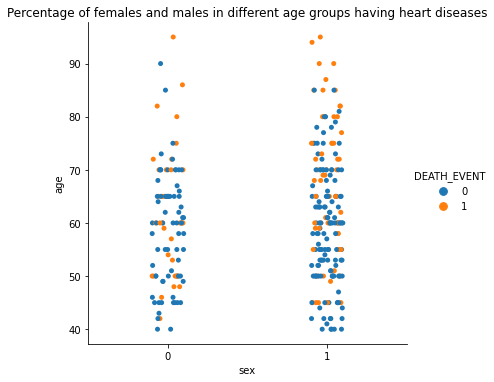

In [301]:
sns.catplot(data=data, y = 'age', x = 'sex', hue='DEATH_EVENT')
plt.title('Percentage of females and males in different age groups having heart diseases')

### 8. The ejection fraction in male and female who were and were not deceased during the follow-up period  

Text(0.5, 1.0, 'The ejection fraction in male and female who were and were not deceased during the follow-up period  ')

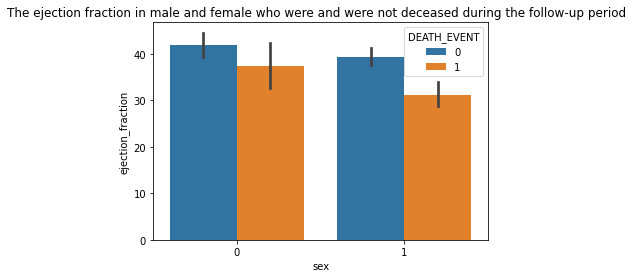

In [302]:
sns.barplot(data=data, x='sex', y='ejection_fraction', hue='DEATH_EVENT')
plt.title('The ejection fraction in male and female who were and were not deceased during the follow-up period  ')

### 9. The creatinine phosphokinase in male and female who were and were not deceased during the follow-up period  

Text(0.5, 1.0, 'The creatinine phosphokinase in male and female who were and were not deceased during the follow-up period  ')

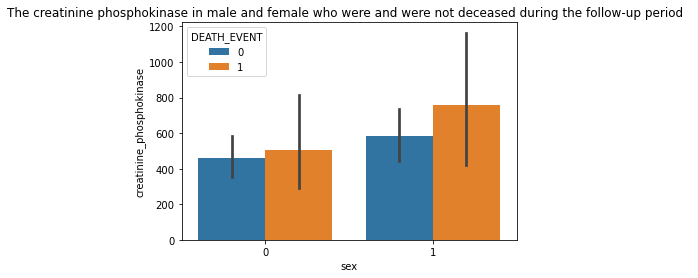

In [303]:
sns.barplot(x = 'sex', y= 'creatinine_phosphokinase', hue = 'DEATH_EVENT', data= data)
plt.title('The creatinine phosphokinase in male and female who were and were not deceased during the follow-up period  ')

### 10. The platelets in male and female who were and were not deceased during the follow-up period  

Text(0.5, 1.0, 'The platelets in male and female who were and were not deceased during the follow-up period')

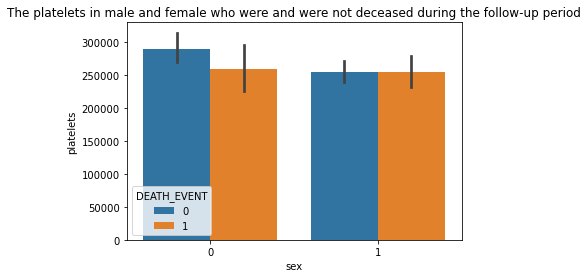

In [304]:
sns.barplot(data=data, x='sex', y='platelets', hue='DEATH_EVENT')
plt.title('The platelets in male and female who were and were not deceased during the follow-up period')

### 11. The serum creatinine in male and female who were and were not deceased during the follow-up period  


Text(0.5, 1.0, 'The serum creatinine in male and female who were and were not deceased during the follow-up period')

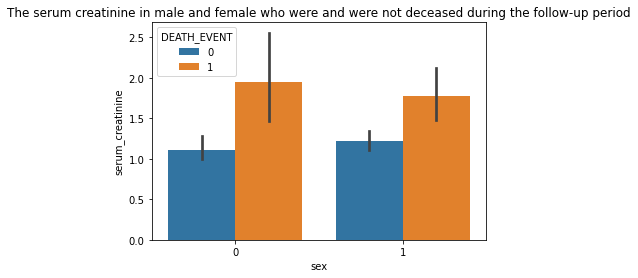

In [305]:
sns.barplot(data=data, x='sex', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('The serum creatinine in male and female who were and were not deceased during the follow-up period')

### 12. The count of male and female who were and were not deceased during the follow-up period  


Text(0.5, 1.0, 'The count of male and female who were and were not deceased during the follow-up period')

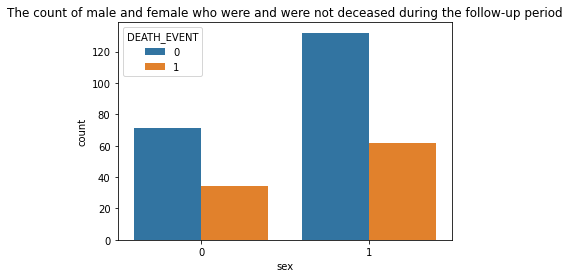

In [306]:
sns.countplot(data=data, x='sex', hue='DEATH_EVENT')
plt.title('The count of male and female who were and were not deceased during the follow-up period')

### 13. The time (follow-up period - days) in male and female who were and were not deceased 


Text(0.5, 1.0, 'The time (follow-up period - days) in male and female who were and were not deceased')

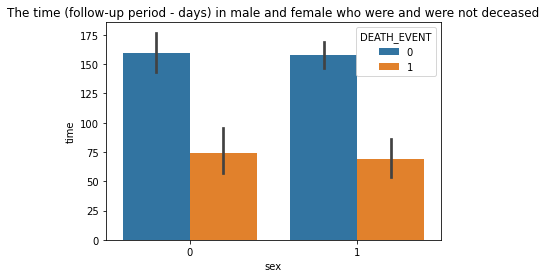

In [307]:
sns.barplot(data=data, x='sex', y='time', hue='DEATH_EVENT')
plt.title('The time (follow-up period - days) in male and female who were and were not deceased')

# 3. Classification

### Value of k in k nearest neighbors

In [308]:
X = data.drop(['DEATH_EVENT'],axis=1) 
y = data['DEATH_EVENT']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

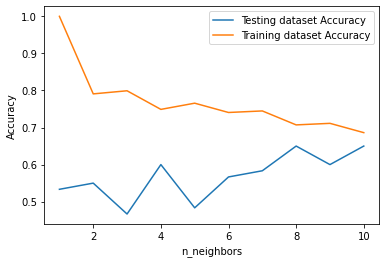

In [310]:
training_accuracy = []
test_accuracy = []

neighbors = range(1,11)

for numberofneighbors in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=numberofneighbors)
    KNN.fit(X_train,y_train)
    
    training_accuracy.append(KNN.score(X_train,y_train))
    test_accuracy.append(KNN.score(X_test,y_test))
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, training_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### a. KNN Classification 

### When p = 1

In [311]:
KNN_p1 = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', metric = 'minkowski', p = 1)
modelKNN_p1 = KNN_p1.fit(X_train, y_train)
predictionKNN_p1 = modelKNN_p1.predict(X_test)

In [312]:
cmKNN_p1 = confusion_matrix(y_test, predictionKNN_p1)
cmKNN_p1

array([[37,  0],
       [20,  3]], dtype=int64)

In [313]:
knnwhenp1 = accuracy_score(y_test, predictionKNN_p1)

In [314]:
print(classification_report(y_test,predictionKNN_p1))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        37
           1       1.00      0.13      0.23        23

    accuracy                           0.67        60
   macro avg       0.82      0.57      0.51        60
weighted avg       0.78      0.67      0.57        60



### When p = 2

In [315]:
KNN_p2 = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN_p2 = KNN_p2.fit(X_train, y_train)
predictionKNN_p2 = modelKNN_p2.predict(X_test)

In [316]:
cmKNN_p2 = confusion_matrix(y_test, predictionKNN_p2)
cmKNN_p2

array([[36,  1],
       [20,  3]], dtype=int64)

In [317]:
knnwhenp2 = accuracy_score(y_test, predictionKNN_p2)


In [318]:
print(classification_report(y_test,predictionKNN_p2))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        37
           1       0.75      0.13      0.22        23

    accuracy                           0.65        60
   macro avg       0.70      0.55      0.50        60
weighted avg       0.68      0.65      0.56        60



### b. Decision Tree 

### Decision Tree - GINI

In [319]:
DT_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_split = 2, 
                                 min_samples_leaf = 1, max_features = None, max_leaf_nodes = None)
modelDT_gini = DT_gini.fit(X_train, y_train)
predictionDT_gini = modelDT_gini.predict(X_test)

In [320]:
cmDT = confusion_matrix(y_test, predictionDT_gini)
cmDT

array([[31,  6],
       [ 9, 14]], dtype=int64)

In [321]:
dtwhengini = accuracy_score(y_test, predictionDT_gini)

In [322]:
print(classification_report(y_test,predictionDT_gini))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.70      0.61      0.65        23

    accuracy                           0.75        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.75      0.75      0.75        60



### Decision Tree - ENTROPY 

In [323]:
DT_entropy = DecisionTreeClassifier(criterion= 'entropy', max_depth = None, min_samples_split = 2, 
                                 min_samples_leaf = 1, max_features = None, max_leaf_nodes = None)
modelDT_entropy = DT_entropy.fit(X_train, y_train)
predictionDT_entropy = modelDT_entropy.predict(X_test)
cmDT = confusion_matrix(y_test, predictionDT_entropy)
cmDT

array([[33,  4],
       [ 5, 18]], dtype=int64)

In [324]:
dtwhenentropy = accuracy_score(y_test, predictionDT_entropy)

In [325]:
print(classification_report(y_test,predictionDT_entropy))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.82      0.78      0.80        23

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



### Tree Visualisation 

In [326]:
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

target_names = ['0','1']

from sklearn import tree
with open('decisiontreegini.dot','w') as f:
    f = tree.export_graphviz(DT_gini , out_file = f, feature_names = feature_names, class_names = target_names, filled = True, rounded = True, special_characters = True) 

In [327]:
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

target_names = ['0','1']

from sklearn import tree
with open('decisiontreeentropy.dot','w') as f:
    f = tree.export_graphviz(DT_entropy , out_file = f, feature_names = feature_names, class_names = target_names, filled = True, rounded = True, special_characters = True) 

# 4. Results:

In [329]:
print('The accuracy score of k-nearest neighbors classification algorithm when p = 1 is '+str(knnwhenp1)) 
print('The accuracy score of k-nearest neighbors classification algorithm when p = 2 is ' + str(knnwhenp2))
print('The accuracy score of decision tree classification algorithm when criterion:gini is '+str(dtwhengini))
print('The accuracy score of decision tree classification algorithm when criterion:entropy is '+str(dtwhenentropy))

The accuracy score of k-nearest neighbors classification algorithm when p = 1 is 0.6666666666666666
The accuracy score of k-nearest neighbors classification algorithm when p = 2 is 0.65
The accuracy score of decision tree classification algorithm when criterion:gini is 0.75
The accuracy score of decision tree classification algorithm when criterion:entropy is 0.85
